In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
electronics = pd.read_pickle("dfElectronics.pkl")

# 1. Most prices are between 0 and 8 (75%)
# 2. Overall prices vary between 0 to 350, prices above 150 are very rare

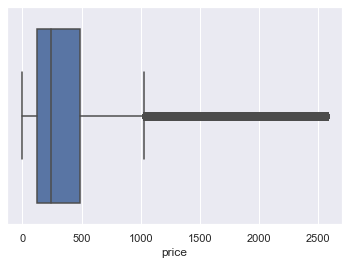

In [4]:
#Checking Price distribution
sns.boxplot(x=electronics["price"])

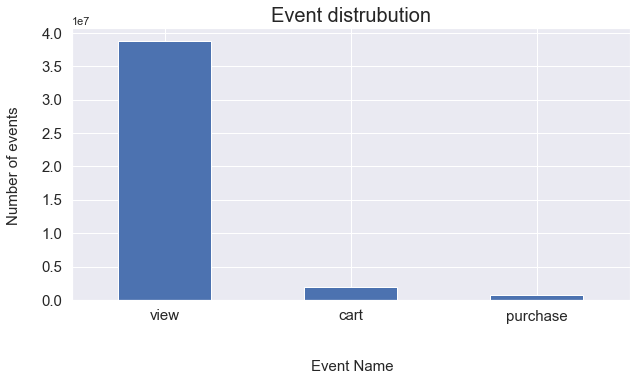

In [5]:
# Event distribution Histogram
electronics.event_type.value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Event distrubution",size=20)
plt.ylabel("Number of events \n ",size=15)
plt.xlabel("\n \n Event Name",size=15)
plt.xticks(size= 15,rotation = 0)
plt.yticks(size= 15)
plt.show()

# 1. Most events are view events
# 2. There are very few purchase events

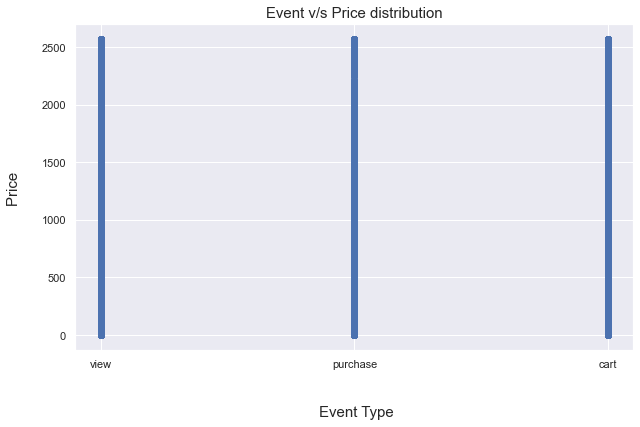

In [6]:
# Checking the relationship between price and purchase
# Plotting a scatter plot

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(electronics["event_type"], electronics["price"])
ax.set_title("Event v/s Price distribution", size=15)
ax.set_xlabel("\n \n Event Type", size=15)
ax.set_ylabel("Price \n", size=15)
plt.show()

In [8]:
# plt.figure(figsize=(15,10))
# ax=sns.barplot(x='event_type',y='price',data=electronics, hue='weekday')

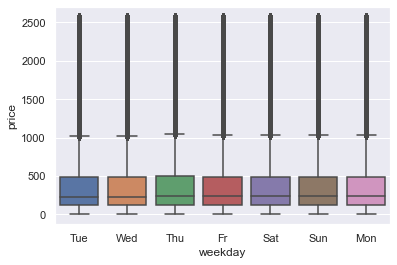

In [9]:
sns.boxplot(data=electronics, x='weekday', y='price')

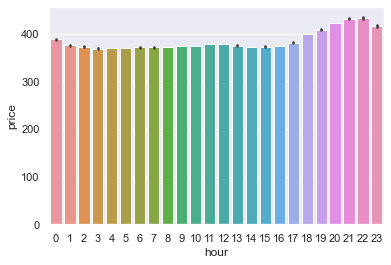

In [10]:
sns.barplot(data=electronics, x='hour', y='price')

# 1.  People view items of broad price range but purchase and add to cart of a smaller range i.e. low to mid
# 2.  Purchases don't vary much by the day of week

# Not much variance by time of day as well
# Slight peak in items being viewed around 2 AM UTC i.e. 10 PM Eastern (if the data is US data)

# Inferences:


In [11]:
#Run this cell for COSMETICS Data ONLY
Features = pd.read_pickle('Electronics_Session_Features.pkl')

In [12]:
Features=Features.drop('user_session',axis=1)

In [13]:
Features['TotalNonPurchaseEvents'] = Features['TotalEventsInSession']-Features['NumTimesPurchasedInSession']

In [14]:
Features.sort_values(by='NumTimesPurchasedInSession',ascending=False).head(3)

,TotalEventsInSession,interactionTime,NumTimesCartedInSession,NumTimesPurchasedInSession,NumTimesViewedInSession,maxPrice,minPrice,AvgAmtCartedInSession,AvgAmtPurchasedInSession,AvgAmtViewedInSession,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Weekend,Purchase,TotalNonPurchaseEvents
1389205,251,6356.0,80,76,95,1660.02,795.64,1084.143125,1087.925263,1087.930316,...,1,0,0,1,0,0,0,0,1,175
4985243,201,48790.0,56,68,77,1106.82,66.90,345.624643,336.984559,350.463896,...,1,1,1,1,1,0,1,0,1,133
2807418,101,5322.0,21,40,40,411.27,170.11,245.349524,269.778750,272.821000,...,1,0,0,0,0,0,0,0,1,61


In [15]:
import math
from math import *

TES = Features.TotalEventsInSession.apply(lambda x : math.log(x,10) if x!=0 else 0)
PS = Features.NumTimesPurchasedInSession.apply(lambda x : math.log(x,10) if x!=0 else 0)
CS = Features.NumTimesCartedInSession.apply(lambda x : math.log(x,10) if x!=0 else 0)

****
VISUALIZATIONS
*****

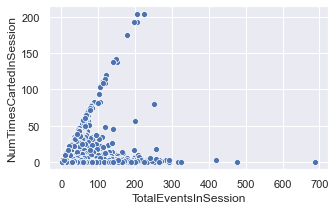

In [16]:
fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(Features["TotalEventsInSession"], Features["NumTimesCartedInSession"])
plt.show()

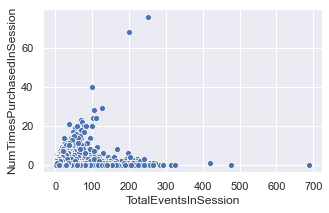

In [17]:
fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(Features["TotalEventsInSession"], Features["NumTimesPurchasedInSession"])
plt.show()

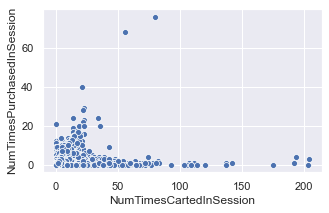

In [18]:
fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(Features['NumTimesCartedInSession'], Features['NumTimesPurchasedInSession'])
plt.show()

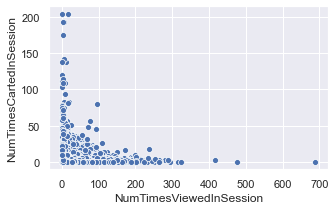

In [19]:
fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(Features["NumTimesViewedInSession"], Features["NumTimesCartedInSession"])
plt.show()

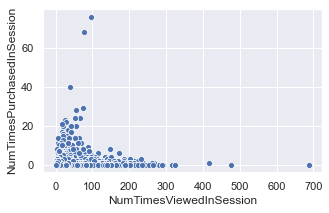

In [20]:
fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(Features['NumTimesViewedInSession'], Features['NumTimesPurchasedInSession'])
plt.show()

# 1. Uptil a certain point purchases slightly increase with total number sessions but there is not a clear linear relationship

# 2. Cart sessions generally tend to increase with more sessions

# 3. As Total sessions increase view sessions also tend to increase

# 4. As Total Sessions increase, the remove sessions tend to rapidly increase uptil a point

# 5. Number of view sessions and Number of Cart Sessions dont have a linear relationship
# In fact, the number of cart sessions are highest when people have lesser view sessions. This could be indicative of immediate purchase decisions

# 6. As number of cart sessions increase the purchases only increase uptil a certain point, beyond which it starts to flatten and then even decrease i.e. indicating cart abandonment

# 5. Again Number of view sessions and Number of Purchase Sessions show the same relationship as Number of view and Number of Cart sessions.

# The number of purchase sessions are highest when people have lesser view sessions. Again could be indicative of immediate purchase decisions

### Duration vs Purchase

In [21]:
time = Features['interactionTime'].apply(lambda x: math.log(x) if x!=0 else 0)

In [22]:
purch = Features['NumTimesPurchasedInSession'].apply(lambda x: math.log(x) if x!=0 else 0)

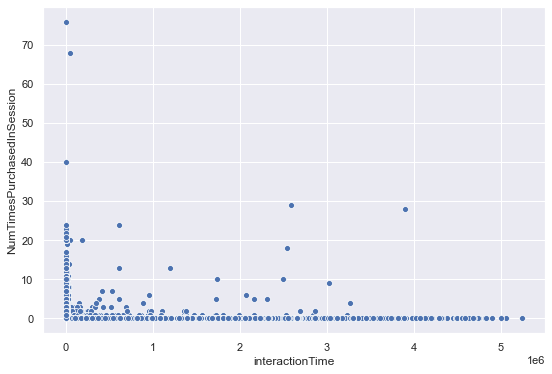

In [23]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(Features['interactionTime'], Features['NumTimesPurchasedInSession'])
plt.show()

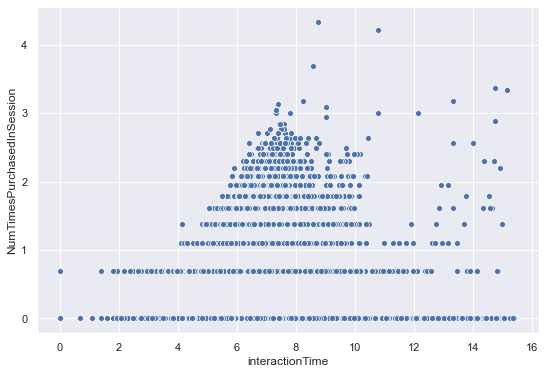

In [24]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(time, purch)
plt.show()

While sessions higher than 1 sec can be in general attributed to more purchases, purchases do dip after a point and a good number of high purchases are seen even with lower duration sessions(immediate purchases)

# By brand, product_id and category_id

### Relationship between number of sessions and number of purchases 

If number of purchase sessions of a user increases from 0 to 10, generally the total number of products he has purchased will increase i.e. People with more purchase sessions will tend to purchase more things given number of sessions are between 0 and 15

Beyond that the data is fractured i.e. its not necessary that if purchases go above 15, the total items purchased will increase, in a broader sense people could purchase more items in lesser sessions

 If we view By Product we see a much stronger relationship between :products being viewed and then purchased


Somewhat positive correlation between products being added to cart and then purchased

Not so much of a clear linear relationship between items being viewed and added and then purchased

User journey based on user session

1. Above informations shows that users can purchase items even without viewing or adding to cart
2. Dont have channel or source info for such users though | Have mailed data owner for info

Summarizing Data Cleaning Steps

Steps to clean data
 1. Dropped the column category_code which has majorly negative values
 2. Dropped those rows where any transaction has been done for items with negative prices
 3. Changed data type of the time stamp column to DateTime , prices to float and others respectively
 4. pickling data for future use